In [186]:
#importando bibliotecas
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt


In [226]:
#Importando bases do Facebook convertidas em xlsx
perfvd = pd.read_excel('C:/Users/adrie/OneDrive/Anajé/_SRIPTS/Performance do Video.xlsx')
perfdt = pd.read_excel('C:/Users/adrie/OneDrive/Anajé/_SRIPTS/Performance por dia.xlsx')
perfidgn = pd.read_excel('C:/Users/adrie/OneDrive/Anajé/_SRIPTS/Idade genero.xlsx')
perfhr = pd.read_excel('C:/Users/adrie/OneDrive/Anajé/_SRIPTS/hora.xlsx')
perf = pd.read_excel('C:/Users/adrie/OneDrive/Anajé/_SRIPTS/Geral.xlsx')

  Início dos relatórios Término dos relatórios               Nome da campanha  \
0            2023-02-20             2023-03-09  [Mensagem] - Edifício Haddock   

  Veiculação da campanha         Orçamento do conjunto de anúncios  \
0               inactive  Usando orçamento do conjunto de anúncios   

   Tipo de orçamento do conjunto de anúncios  \
0                                          0   

                  Configuração de atribuição  Resultados  \
0  Clique de 7 dias ou visualização de 1 dia          14   

                             Indicador de resultados  Alcance  Impressões  \
0  actions:onsite_conversion.messaging_conversati...     5854        8499   

   Custo por resultados  Valor gasto (BRL)   Término  
0             15.567857             217.95  Contínuo  


In [227]:
#Tratando a base e criando o Funil de Conversão
df_repr = pd.DataFrame({
    'Tempo': ['Impressões','Alcance', 'Mensagens'],
    'Reproduções': [
        perf['Impressões'].values[0],
        perf['Alcance'].values[0],
        perf['Resultados'].values[0],
    ]
})

FigRep = go.Figure(go.Funnel(
    y=df_repr['Tempo'],
    x=df_repr['Reproduções'],
    textinfo="value",
    marker=dict(color='#593B08')
))

FigRep.update_layout(
    width=600,
    height=400,
    title={
        'text': "Funil de Conversão",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    margin=dict(l=20, r=20, t=60, b=20),
    plot_bgcolor='#fff',
    paper_bgcolor="white",
)


FigRep.update_traces(marker=dict(line=dict(width=1, color='#593B08')))

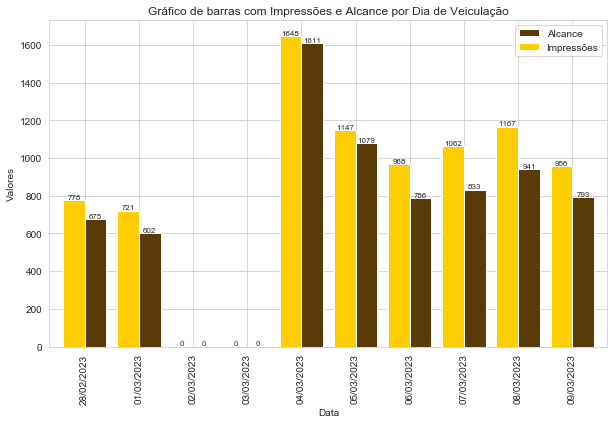

In [228]:
#Tratando a base e criando o Alcance e Impressões por Data de veiculação
perfdt['Início dos relatórios'] = pd.to_datetime(perfdt['Início dos relatórios'])

df_dt = pd.DataFrame({
    'Data': perfdt['Início dos relatórios'].dt.strftime('%d/%m/%Y'),
    'Alcance': perfdt['Alcance'],
    'Impressões': perfdt['Impressões']
})

df_dt.set_index('Data', inplace=True)

ax = df_dt.plot(kind='bar',
                color=['#593B08', '#ffce00'],
                figsize=(10, 6),
                width=0.8
               )
ax.invert_xaxis() 

ax.set_title('Gráfico de barras com Impressões e Alcance por Dia de Veiculação')
plt.xlabel('Data')
plt.ylabel('Valores')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.annotate(str(y), (x, y), ha='center', va='bottom', fontsize=8)


plt.show()


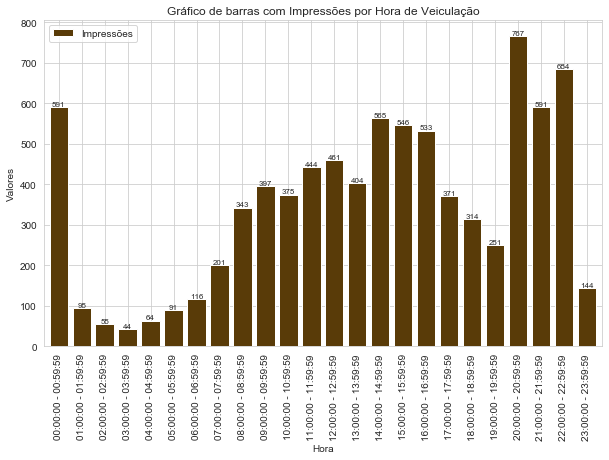

In [216]:
#Tratando a base e criando o Alcance por Hora

df_dt = pd.DataFrame({
    'Hora': perfhr['Hora do dia (fuso horário da conta de anúncios)'],
    'Impressões': perfhr['Impressões']
})

df_dt.set_index('Hora', inplace=True)

ax = df_dt.plot(kind='bar',
                color=['#593B08', '#ffce00'],
                figsize=(10, 6),
                width=0.8
               )

ax.set_title('Gráfico de barras com Impressões por Hora de Veiculação')
plt.xlabel('Hora')
plt.ylabel('Valores')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.annotate(str(y), (x, y), ha='center', va='bottom', fontsize=8)


plt.show()

AttributeError: module 'plotly' has no attribute 'xlabel'

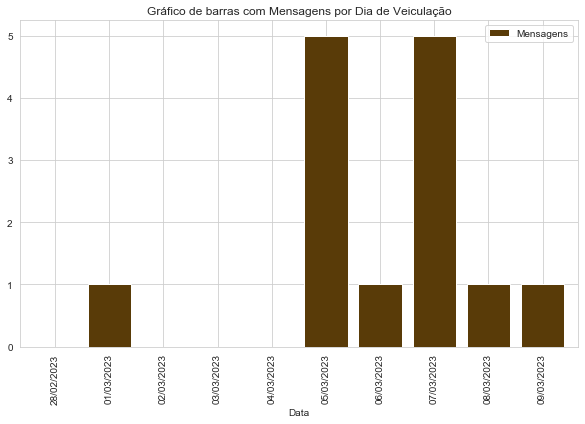

In [151]:
#Tratando a base e criando Resultados por Data de Veiculação
perfdt['Início dos relatórios'] = pd.to_datetime(perfdt['Início dos relatórios'])

df_dt = pd.DataFrame({
    'Data': perfdt['Início dos relatórios'].dt.strftime('%d/%m/%Y'),
    'Mensagens': perfdt['Resultados'],
})

df_dt.set_index('Data', inplace=True)

ax = df_dt.plot(kind='bar',
                color=['#593B08'],
                figsize=(10, 6),
                width=0.8
               )
ax.invert_xaxis() 

ax.set_title('Gráfico de barras com Mensagens por Dia de Veiculação')
plt.xlabel('Data')
plt.ylabel('Valores')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.annotate(str(y), (x, y), ha='center', va='bottom', fontsize=8)


plt.show()

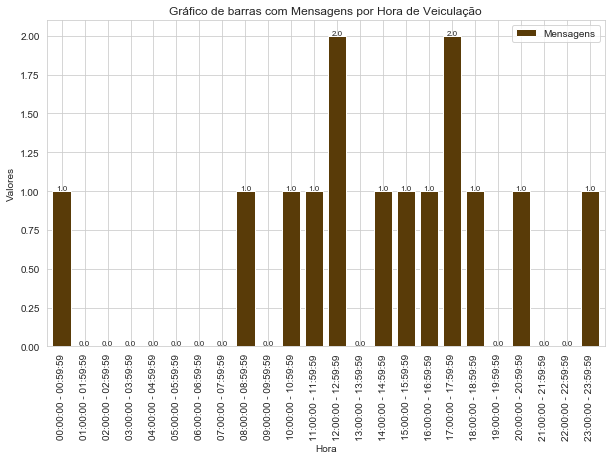

In [233]:
#Tratando a base e criando os Resultados por hora de veiculação
df_dt = pd.DataFrame({
    'Hora': perfhr['Hora do dia (fuso horário da conta de anúncios)'],
    'Mensagens': perfhr['Resultados']
})


df_dt.set_index('Hora', inplace=True)

ax = df_dt.plot(kind='bar',
                color=['#593B08', '#ffce00'],
                figsize=(10, 6),
                width=0.8
               )

ax.set_title('Gráfico de barras com Mensagens por Hora de Veiculação')
plt.xlabel('Hora')
plt.ylabel('Valores')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.annotate(str(y), (x, y), ha='center', va='bottom', fontsize=8)


plt.show()

In [144]:
#Tratando a base e criando Funil de visualizações para Vídeos
df_repr = pd.DataFrame({
    'Tempo': ['ThruPlays','25%', '50%', '75%', '95%', '100%'],
    'Reproduções': [
        perfvd['ThruPlays'].values[0],
        perfvd['Reproduções de 25% do vídeo'].values[0],
        perfvd['Reproduções de 50% do vídeo'].values[0],
        perfvd['Reproduções de 75% do vídeo'].values[0],
        perfvd['Reproduções de 95% do vídeo'].values[0],
        perfvd['Reproduções de 100% do vídeo'].values[0]
    ]
})

FigRep = go.Figure(go.Funnel(
    y=df_repr['Tempo'],
    x=df_repr['Reproduções'],
    textinfo="value",
    marker=dict(color='#593B08')
))

FigRep.update_layout(
    width=600,
    height=400,
    title={
        'text': "Funil de visualizações",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    margin=dict(l=20, r=20, t=60, b=20),
    plot_bgcolor='#fff',
    paper_bgcolor="white",
)


FigRep.update_traces(marker=dict(line=dict(width=1, color='#593B08')))


AttributeError: module 'plotly' has no attribute 'xlabel'

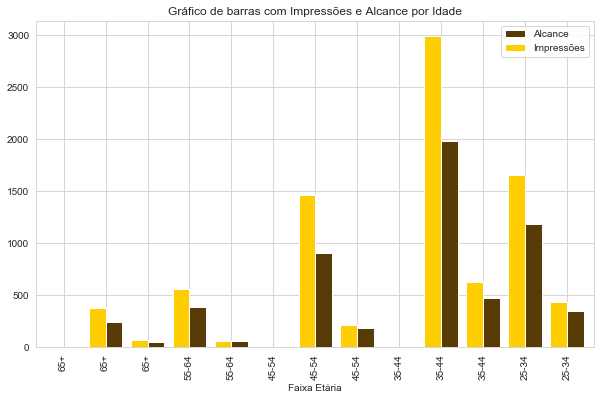

In [157]:
#Tratando a base e criando Alcance e Impressões por Faixa Etária
df_dt = pd.DataFrame({
    'Faixa Etária': perfidgn['Idade'],
    'Alcance': perfidgn['Alcance'],
    'Impressões': perfidgn['Impressões']
})

df_dt.set_index('Faixa Etária', inplace=True)

ax = df_dt.plot(kind='bar',
                color=['#593B08', '#ffce00'],
                figsize=(10, 6),
                width=0.8
               )
ax.invert_xaxis() 

ax.set_title('Gráfico de barras com Impressões e Alcance por Faixa Etária')
plt.xlabel('Data')
plt.ylabel('Valores')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.annotate(str(y), (x, y), ha='center', va='bottom', fontsize=8)


plt.show()


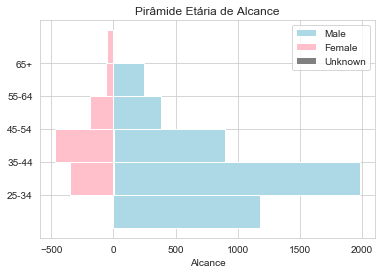

In [201]:
#Tratando a base e criando Pirâmide Etária de Alcance
df_grouped = perfidgn.groupby(['Idade', 'Gênero']).sum().reset_index()

fig, ax = plt.subplots()

male_data = df_grouped[df_grouped['Gênero'] == 'male']
female_data = df_grouped[df_grouped['Gênero'] == 'female']
unknown_data = df_grouped[df_grouped['Gênero'] == 'unknown']


ax.barh(male_data['Idade'], male_data['Alcance'], height=-1, align='edge', color='lightblue', label='Male')
ax.barh(female_data['Idade'], -female_data['Alcance'], height=1, align='edge', color='pink', label='Female')
ax.barh(unknown_data['Idade'], unknown_data['Alcance'], height=-1, align='edge', color='gray', label='Unknown')



ax.set_title('Pirâmide Etária de Alcance')
ax.set_xlabel('Alcance')
ax.legend()

plt.show()


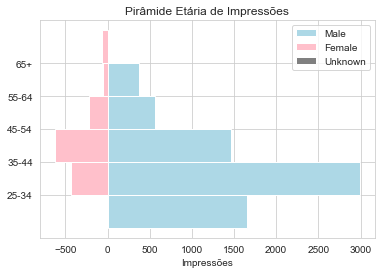

In [202]:
#Tratando a base e criando Pirâmide Etária de Impressões
df_grouped = perfidgn.groupby(['Idade', 'Gênero']).sum().reset_index()

fig, ax = plt.subplots()

male_data = df_grouped[df_grouped['Gênero'] == 'male']
female_data = df_grouped[df_grouped['Gênero'] == 'female']
unknown_data = df_grouped[df_grouped['Gênero'] == 'unknown']


ax.barh(male_data['Idade'], male_data['Impressões'], height=-1, align='edge', color='lightblue', label='Male')
ax.barh(female_data['Idade'], -female_data['Impressões'], height=1, align='edge', color='pink', label='Female')
ax.barh(unknown_data['Idade'], unknown_data['Impressões'], height=-1, align='edge', color='gray', label='Unknown')



ax.set_title('Pirâmide Etária de Impressões')
ax.set_xlabel('Impressões')
ax.legend()

plt.show()

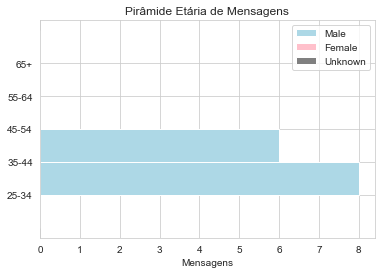

In [203]:
#Tratando a base e criando pirâmide etária de Resultados
df_grouped = perfidgn.groupby(['Idade', 'Gênero']).sum().reset_index()

fig, ax = plt.subplots()

male_data = df_grouped[df_grouped['Gênero'] == 'male']
female_data = df_grouped[df_grouped['Gênero'] == 'female']
unknown_data = df_grouped[df_grouped['Gênero'] == 'unknown']


ax.barh(male_data['Idade'], male_data['Resultados'], height=-1, align='edge', color='lightblue', label='Male')
ax.barh(female_data['Idade'], -female_data['Resultados'], height=1, align='edge', color='pink', label='Female')
ax.barh(unknown_data['Idade'], unknown_data['Resultados'], height=-1, align='edge', color='gray', label='Unknown')



ax.set_title('Pirâmide Etária de Mensagens')
ax.set_xlabel('Mensagens')
ax.legend()

plt.show()